# Dimensional Reduction Using Feature Extraction

In [ ]:
import matplotlib.pyplot as plt


## Challenge 1 (warm up): PCA on images

In this exercise we will go over the example at the end of chapter *5.09 In Depth: Principal Component Analysis*, namely **Example: Eigenfaces**. Copy the code here and go through the following steps:

1. Load the Labeled Faces in the Wild Dataset (at least 60 images per person).

2. Perform a PCA and look at the first 150 components.

3. Plot the images corresponding to the first 24 principal components.

4. Make the plot of the cumulative explained variance as a function of the number of components. 

5. Compare the images reconstructed from just the first 150 PCA components to the full resolution images. Plot a few examples (the book example compares 20 images but feel free to do more).

You will see that 150 components is already sufficient to keep most of the information. But can we reduce the data further and still get away with it? Repeat the last step (the comparison), only this time use a decreasing number of PCA components until you reach a point where you stop recognizing the reconstructed images. How many components correspond to that borderline situation, and what is the explained variance? 

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

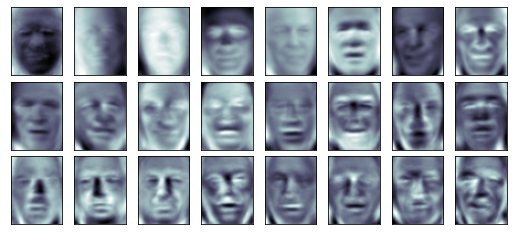

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

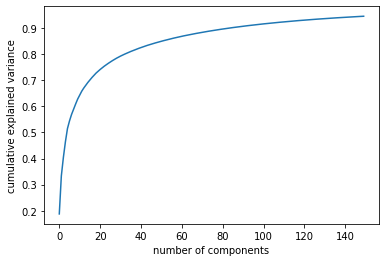

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

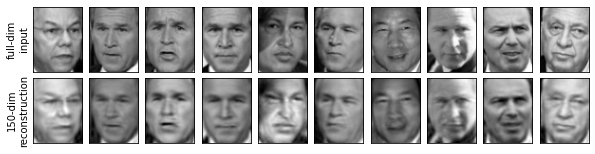

In [ ]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

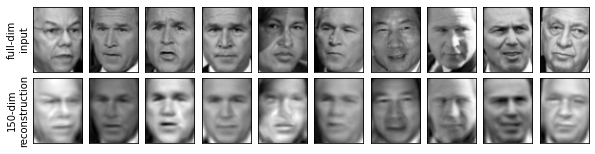

In [ ]:
pca = RandomizedPCA(65).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');


## Challenge 2: PCA visualization on the breast cancer wisconsin dataset

For this exercise we will use one of the standard datasets, the breast cancer wisconsin dataset  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

We shall repeat the steps from the lecture in order to identify the two principal components and find out how much of the explained variance is contained in them. First let's load the dataset, it has 569 instances and 30 features:

In [ ]:
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the breast cancer dataset
dataset = datasets.load_breast_cancer()

# Load the features
X = dataset.data

In [ ]:
# View the shape of the dataset
X.shape

(569, 30)

In [ ]:
# View the data
X

12.072680399588076

Your task:

1. First standardize the features by removing the mean and scaling to unit variance (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). This is important when the features have different units and/or their typical values differ by orders of magnitude (to see how standardization helps with prediction accuracy see the worked out example with the wine dataset https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).

2. Now apply PCA, find the two highest principal components and make a scatter plot. How much of the explained variance is due to those two components?


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
new_X = scaler.fit_transform(X)
print(new_X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(new_X)
components = pca.transform(new_X)
projected = pca.inverse_transform(components)

(-3.871323047295381, 12.83191865896348, -2.5007253542503025, 5.808050480837192)

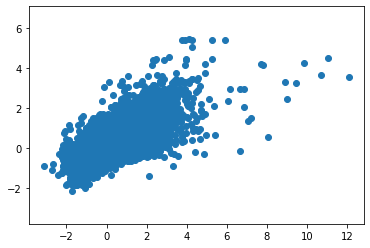

In [ ]:
fig = plt.scatter(new_X, projected)
plt.axis('equal')

In [ ]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


44.27% of variance is explained by the first PC, 

## Challenge 3: Handling highly correlated features

One common problem in machine learning is the presence of highly correlated features in our data. In that case, the information they contain is very similar, and likely redundant. The solution is simple: remove one of the correlated features. For this exercise we'll use a toy dataset:

In [ ]:
# Load libraries
import pandas as pd
import numpy as np


# Create feature matrix with two highly correlated features
X = np.array([[1, 1, 1, 1],
              [2, 2, 0, 2],
              [3, 3, 1, 2],
              [4, 4, 0, 4],
              [5, 5, 1, 5],
              [6, 6, 0, 6],
              [7, 7, 1, 7],
              [8, 7, 0, 8],
              [9, 7, 1, 9]])

# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
df


,0,1,2,3
0,1,1,1,1
1,2,2,0,2
2,3,3,1,2
3,4,4,0,4
4,5,5,1,5
5,6,6,0,6
6,7,7,1,7
7,8,7,0,8
8,9,7,1,9


Your task is:

1. Create the correlation matrix (hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

2. Identify features with correlation coefficient above say 0.9.

3. Create a new dataframe dropping all but one of the correlated features.

In [ ]:
df.corr()

,0,1,2,3
0,1.000000,0.976103,0.000000,0.993644
1,0.976103,1.000000,-0.034503,0.970538
2,0.000000,-0.034503,1.000000,-0.037012
3,0.993644,0.970538,-0.037012,1.000000


In [ ]:
df_new = df.drop(1, axis=1)
df_new = df_new.drop(3, axis=1)
print(df_new)

   0  2
0  1  1
1  2  0
2  3  1
3  4  0
4  5  1
5  6  0
6  7  1
7  8  0
8  9  1
